In [1]:
%matplotlib inline

In [3]:
import os
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

In [4]:
# Example of use with vector mode and watershed segmentation
import otbApplication
os.chdir("/home/jonathan/ubc/capstone/orthophoto/2014")
app = otbApplication.Registry.CreateApplication("LargeScaleMeanShift")

app.SetParameterString("in", "483E_5454N.tif")
app.SetParameterInt("spatialr", 4)
app.SetParameterFloat("ranger", 80)
app.SetParameterInt("minsize", 16)
app.SetParameterString("mode.vector.out", "regions.shp")

app.ExecuteAndWriteOutput()


2021-01-18 12:41:35 (INFO) LargeScaleMeanShift: Default RAM limit for OTB is 256 MB
2021-01-18 12:41:35 (INFO) LargeScaleMeanShift: GDAL maximum cache size is 801 MB
2021-01-18 12:41:35 (INFO) LargeScaleMeanShift: OTB will use at most 12 threads
2021-01-18 12:41:35 (INFO) LargeScaleMeanShift: Smoothing step...
2021-01-18 12:41:35 (INFO) LargeScaleMeanShift: Margin of 401 pixels applied to each tile to stabilized mean shift filtering.

2021-01-18 12:41:35 (INFO) LargeScaleMeanShift: Mode Search is disabled.

2021-01-18 12:41:35 (INFO) LargeScaleMeanShift: Number of tiles: 20 x 20
2021-01-18 12:41:35 (INFO) LargeScaleMeanShift: Tile shifting ...
2021-01-18 12:41:36 (INFO): File regions_0_0_SEG.tif will be written in 1 blocks of 501x501 pixels
2021-01-18 12:41:36 (INFO): File regions_0_1_SEG.tif will be written in 1 blocks of 501x501 pixels
2021-01-18 12:41:37 (INFO): File regions_0_2_SEG.tif will be written in 1 blocks of 501x501 pixels
2021-01-18 12:41:38 (INFO): File regions_0_3_SEG.ti

2021-01-18 12:42:26 (INFO): File regions_3_16_SEG.tif will be written in 1 blocks of 501x501 pixels
2021-01-18 12:42:26 (INFO): File regions_3_17_SEG.tif will be written in 1 blocks of 501x501 pixels
2021-01-18 12:42:27 (INFO): File regions_3_18_SEG.tif will be written in 1 blocks of 501x501 pixels
2021-01-18 12:42:28 (INFO): File regions_3_19_SEG.tif will be written in 1 blocks of 500x501 pixels
2021-01-18 12:42:28 (INFO): File regions_4_0_SEG.tif will be written in 1 blocks of 501x501 pixels
2021-01-18 12:42:29 (INFO): File regions_4_1_SEG.tif will be written in 1 blocks of 501x501 pixels
2021-01-18 12:42:30 (INFO): File regions_4_2_SEG.tif will be written in 1 blocks of 501x501 pixels
2021-01-18 12:42:30 (INFO): File regions_4_3_SEG.tif will be written in 1 blocks of 501x501 pixels
2021-01-18 12:42:31 (INFO): File regions_4_4_SEG.tif will be written in 1 blocks of 501x501 pixels
2021-01-18 12:42:32 (INFO): File regions_4_5_SEG.tif will be written in 1 blocks of 501x501 pixels
2021-0

2021-01-18 12:43:22 (INFO): File regions_7_19_SEG.tif will be written in 1 blocks of 500x501 pixels
2021-01-18 12:43:23 (INFO): File regions_8_0_SEG.tif will be written in 1 blocks of 501x501 pixels
2021-01-18 12:43:24 (INFO): File regions_8_1_SEG.tif will be written in 1 blocks of 501x501 pixels
2021-01-18 12:43:24 (INFO): File regions_8_2_SEG.tif will be written in 1 blocks of 501x501 pixels
2021-01-18 12:43:25 (INFO): File regions_8_3_SEG.tif will be written in 1 blocks of 501x501 pixels
2021-01-18 12:43:26 (INFO): File regions_8_4_SEG.tif will be written in 1 blocks of 501x501 pixels
2021-01-18 12:43:26 (INFO): File regions_8_5_SEG.tif will be written in 1 blocks of 501x501 pixels
2021-01-18 12:43:27 (INFO): File regions_8_6_SEG.tif will be written in 1 blocks of 501x501 pixels
2021-01-18 12:43:28 (INFO): File regions_8_7_SEG.tif will be written in 1 blocks of 501x501 pixels
2021-01-18 12:43:28 (INFO): File regions_8_8_SEG.tif will be written in 1 blocks of 501x501 pixels
2021-01-1

2021-01-18 12:44:19 (INFO): File regions_12_1_SEG.tif will be written in 1 blocks of 501x501 pixels
2021-01-18 12:44:20 (INFO): File regions_12_2_SEG.tif will be written in 1 blocks of 501x501 pixels
2021-01-18 12:44:21 (INFO): File regions_12_3_SEG.tif will be written in 1 blocks of 501x501 pixels
2021-01-18 12:44:22 (INFO): File regions_12_4_SEG.tif will be written in 1 blocks of 501x501 pixels
2021-01-18 12:44:22 (INFO): File regions_12_5_SEG.tif will be written in 1 blocks of 501x501 pixels
2021-01-18 12:44:23 (INFO): File regions_12_6_SEG.tif will be written in 1 blocks of 501x501 pixels
2021-01-18 12:44:24 (INFO): File regions_12_7_SEG.tif will be written in 1 blocks of 501x501 pixels
2021-01-18 12:44:24 (INFO): File regions_12_8_SEG.tif will be written in 1 blocks of 501x501 pixels
2021-01-18 12:44:25 (INFO): File regions_12_9_SEG.tif will be written in 1 blocks of 501x501 pixels
2021-01-18 12:44:26 (INFO): File regions_12_10_SEG.tif will be written in 1 blocks of 501x501 pixels

2021-01-18 12:45:10 (INFO): File regions_16_3_SEG.tif will be written in 1 blocks of 501x501 pixels
2021-01-18 12:45:10 (INFO): File regions_16_4_SEG.tif will be written in 1 blocks of 501x501 pixels
2021-01-18 12:45:10 (INFO): File regions_16_5_SEG.tif will be written in 1 blocks of 501x501 pixels
2021-01-18 12:45:11 (INFO): File regions_16_6_SEG.tif will be written in 1 blocks of 501x501 pixels
2021-01-18 12:45:11 (INFO): File regions_16_7_SEG.tif will be written in 1 blocks of 501x501 pixels
2021-01-18 12:45:12 (INFO): File regions_16_8_SEG.tif will be written in 1 blocks of 501x501 pixels
2021-01-18 12:45:13 (INFO): File regions_16_9_SEG.tif will be written in 1 blocks of 501x501 pixels
2021-01-18 12:45:13 (INFO): File regions_16_10_SEG.tif will be written in 1 blocks of 501x501 pixels
2021-01-18 12:45:14 (INFO): File regions_16_11_SEG.tif will be written in 1 blocks of 501x501 pixels
2021-01-18 12:45:15 (INFO): File regions_16_12_SEG.tif will be written in 1 blocks of 501x501 pixe

2021-01-18 12:45:54 (INFO): File regions_10_0_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:45:54 (INFO): File regions_11_0_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:45:54 (INFO): File regions_12_0_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:45:54 (INFO): File regions_13_0_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:45:54 (INFO): File regions_14_0_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:45:54 (INFO): File regions_15_0_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:45:54 (INFO): File regions_16_0_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:45:54 (INFO): File regions_17_0_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:45:54 (INFO): File regions_18_0_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:45:54 (INFO): File regions_19_0_RELAB.tif will be written in 1 block

2021-01-18 12:45:56 (INFO): File regions_13_4_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:45:56 (INFO): File regions_14_4_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:45:56 (INFO): File regions_15_4_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:45:56 (INFO): File regions_16_4_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:45:56 (INFO): File regions_17_4_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:45:56 (INFO): File regions_18_4_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:45:56 (INFO): File regions_19_4_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:45:56 (INFO): File regions_0_5_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:45:56 (INFO): File regions_1_5_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:45:56 (INFO): File regions_2_5_RELAB.tif will be written in 1 blocks o

2021-01-18 12:45:57 (INFO): File regions_5_9_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:45:57 (INFO): File regions_6_9_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:45:57 (INFO): File regions_7_9_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:45:57 (INFO): File regions_8_9_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:45:57 (INFO): File regions_9_9_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:45:57 (INFO): File regions_10_9_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:45:57 (INFO): File regions_11_9_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:45:57 (INFO): File regions_12_9_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:45:57 (INFO): File regions_13_9_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:45:57 (INFO): File regions_14_9_RELAB.tif will be written in 1 blocks of 

2021-01-18 12:45:59 (INFO): File regions_17_13_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:45:59 (INFO): File regions_18_13_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:45:59 (INFO): File regions_19_13_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:45:59 (INFO): File regions_0_14_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:45:59 (INFO): File regions_1_14_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:45:59 (INFO): File regions_2_14_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:45:59 (INFO): File regions_3_14_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:45:59 (INFO): File regions_4_14_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:45:59 (INFO): File regions_5_14_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:45:59 (INFO): File regions_6_14_RELAB.tif will be written in 1 bl

2021-01-18 12:46:01 (INFO): File regions_7_18_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:46:01 (INFO): File regions_8_18_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:46:01 (INFO): File regions_9_18_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:46:01 (INFO): File regions_10_18_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:46:01 (INFO): File regions_11_18_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:46:01 (INFO): File regions_12_18_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:46:01 (INFO): File regions_13_18_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:46:01 (INFO): File regions_14_18_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:46:01 (INFO): File regions_15_18_RELAB.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:46:01 (INFO): File regions_16_18_RELAB.tif will be written in 

2021-01-18 12:46:01 (INFO): Estimated memory for full processing: 2.82288MB (avail.: 256 MB), optimal image partitioning: 1 blocks
2021-01-18 12:46:01 (INFO): File regions_5_1_FINAL.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:46:02 (INFO): Estimated memory for full processing: 2.82288MB (avail.: 256 MB), optimal image partitioning: 1 blocks
2021-01-18 12:46:02 (INFO): File regions_6_1_FINAL.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:46:02 (INFO): Estimated memory for full processing: 2.82288MB (avail.: 256 MB), optimal image partitioning: 1 blocks
2021-01-18 12:46:02 (INFO): File regions_7_1_FINAL.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:46:02 (INFO): Estimated memory for full processing: 2.82288MB (avail.: 256 MB), optimal image partitioning: 1 blocks
2021-01-18 12:46:02 (INFO): File regions_8_1_FINAL.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:46:02 (INFO): Estimated memory for full processing: 2.8228

2021-01-18 12:46:02 (INFO): Estimated memory for full processing: 2.82288MB (avail.: 256 MB), optimal image partitioning: 1 blocks
2021-01-18 12:46:02 (INFO): File regions_15_3_FINAL.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:46:02 (INFO): Estimated memory for full processing: 2.82288MB (avail.: 256 MB), optimal image partitioning: 1 blocks
2021-01-18 12:46:02 (INFO): File regions_16_3_FINAL.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:46:02 (INFO): Estimated memory for full processing: 2.82288MB (avail.: 256 MB), optimal image partitioning: 1 blocks
2021-01-18 12:46:02 (INFO): File regions_17_3_FINAL.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:46:02 (INFO): Estimated memory for full processing: 2.82288MB (avail.: 256 MB), optimal image partitioning: 1 blocks
2021-01-18 12:46:02 (INFO): File regions_18_3_FINAL.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:46:02 (INFO): Estimated memory for full processing: 2.

2021-01-18 12:46:02 (INFO): Estimated memory for full processing: 2.82288MB (avail.: 256 MB), optimal image partitioning: 1 blocks
2021-01-18 12:46:02 (INFO): File regions_5_6_FINAL.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:46:02 (INFO): Estimated memory for full processing: 2.82288MB (avail.: 256 MB), optimal image partitioning: 1 blocks
2021-01-18 12:46:02 (INFO): File regions_6_6_FINAL.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:46:02 (INFO): Estimated memory for full processing: 2.82288MB (avail.: 256 MB), optimal image partitioning: 1 blocks
2021-01-18 12:46:02 (INFO): File regions_7_6_FINAL.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:46:02 (INFO): Estimated memory for full processing: 2.82288MB (avail.: 256 MB), optimal image partitioning: 1 blocks
2021-01-18 12:46:02 (INFO): File regions_8_6_FINAL.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:46:02 (INFO): Estimated memory for full processing: 2.8228

2021-01-18 12:46:03 (INFO): Estimated memory for full processing: 2.82288MB (avail.: 256 MB), optimal image partitioning: 1 blocks
2021-01-18 12:46:03 (INFO): File regions_16_8_FINAL.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:46:03 (INFO): Estimated memory for full processing: 2.82288MB (avail.: 256 MB), optimal image partitioning: 1 blocks
2021-01-18 12:46:03 (INFO): File regions_17_8_FINAL.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:46:03 (INFO): Estimated memory for full processing: 2.82288MB (avail.: 256 MB), optimal image partitioning: 1 blocks
2021-01-18 12:46:03 (INFO): File regions_18_8_FINAL.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:46:03 (INFO): Estimated memory for full processing: 2.82288MB (avail.: 256 MB), optimal image partitioning: 1 blocks
2021-01-18 12:46:03 (INFO): File regions_19_8_FINAL.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:46:03 (INFO): Estimated memory for full processing: 2.

2021-01-18 12:46:03 (INFO): Estimated memory for full processing: 2.82288MB (avail.: 256 MB), optimal image partitioning: 1 blocks
2021-01-18 12:46:03 (INFO): File regions_5_11_FINAL.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:46:03 (INFO): Estimated memory for full processing: 2.82288MB (avail.: 256 MB), optimal image partitioning: 1 blocks
2021-01-18 12:46:03 (INFO): File regions_6_11_FINAL.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:46:03 (INFO): Estimated memory for full processing: 2.82288MB (avail.: 256 MB), optimal image partitioning: 1 blocks
2021-01-18 12:46:03 (INFO): File regions_7_11_FINAL.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:46:03 (INFO): Estimated memory for full processing: 2.82288MB (avail.: 256 MB), optimal image partitioning: 1 blocks
2021-01-18 12:46:03 (INFO): File regions_8_11_FINAL.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:46:03 (INFO): Estimated memory for full processing: 2.

2021-01-18 12:46:04 (INFO): Estimated memory for full processing: 2.82288MB (avail.: 256 MB), optimal image partitioning: 1 blocks
2021-01-18 12:46:04 (INFO): File regions_13_13_FINAL.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:46:04 (INFO): Estimated memory for full processing: 2.82288MB (avail.: 256 MB), optimal image partitioning: 1 blocks
2021-01-18 12:46:04 (INFO): File regions_14_13_FINAL.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:46:04 (INFO): Estimated memory for full processing: 2.82288MB (avail.: 256 MB), optimal image partitioning: 1 blocks
2021-01-18 12:46:04 (INFO): File regions_15_13_FINAL.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:46:04 (INFO): Estimated memory for full processing: 2.82288MB (avail.: 256 MB), optimal image partitioning: 1 blocks
2021-01-18 12:46:04 (INFO): File regions_16_13_FINAL.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:46:04 (INFO): Estimated memory for full processing

2021-01-18 12:46:04 (INFO): Estimated memory for full processing: 2.82288MB (avail.: 256 MB), optimal image partitioning: 1 blocks
2021-01-18 12:46:04 (INFO): File regions_3_16_FINAL.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:46:04 (INFO): Estimated memory for full processing: 2.82288MB (avail.: 256 MB), optimal image partitioning: 1 blocks
2021-01-18 12:46:04 (INFO): File regions_4_16_FINAL.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:46:04 (INFO): Estimated memory for full processing: 2.82288MB (avail.: 256 MB), optimal image partitioning: 1 blocks
2021-01-18 12:46:04 (INFO): File regions_5_16_FINAL.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:46:04 (INFO): Estimated memory for full processing: 2.82288MB (avail.: 256 MB), optimal image partitioning: 1 blocks
2021-01-18 12:46:04 (INFO): File regions_6_16_FINAL.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:46:04 (INFO): Estimated memory for full processing: 2.

2021-01-18 12:46:04 (INFO): Estimated memory for full processing: 2.82288MB (avail.: 256 MB), optimal image partitioning: 1 blocks
2021-01-18 12:46:04 (INFO): File regions_14_18_FINAL.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:46:04 (INFO): Estimated memory for full processing: 2.82288MB (avail.: 256 MB), optimal image partitioning: 1 blocks
2021-01-18 12:46:04 (INFO): File regions_15_18_FINAL.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:46:04 (INFO): Estimated memory for full processing: 2.82288MB (avail.: 256 MB), optimal image partitioning: 1 blocks
2021-01-18 12:46:04 (INFO): File regions_16_18_FINAL.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:46:04 (INFO): Estimated memory for full processing: 2.82288MB (avail.: 256 MB), optimal image partitioning: 1 blocks
2021-01-18 12:46:04 (INFO): File regions_17_18_FINAL.tif will be written in 1 blocks of 500x500 pixels
2021-01-18 12:46:04 (INFO): Estimated memory for full processing

2021-01-18 12:46:18 (INFO): Estimated memory for full processing: 1159.78MB (avail.: 256 MB), optimal image partitioning: 5 blocks
2021-01-18 12:46:18 (INFO): Estimation will be performed in 6 blocks of 10000x1667 pixels
2021-01-18 12:46:18 (INFO): Estimated memory for full processing: 1159.78MB (avail.: 256 MB), optimal image partitioning: 5 blocks
2021-01-18 12:46:18 (INFO): Estimation will be performed in 6 blocks of 10000x1667 pixels
2021-01-18 12:46:19 (INFO): Estimated memory for full processing: 1159.78MB (avail.: 256 MB), optimal image partitioning: 5 blocks
2021-01-18 12:46:19 (INFO): Estimation will be performed in 6 blocks of 10000x1667 pixels
2021-01-18 12:46:19 (INFO): Estimated memory for full processing: 1159.78MB (avail.: 256 MB), optimal image partitioning: 5 blocks
2021-01-18 12:46:19 (INFO): Estimation will be performed in 6 blocks of 10000x1667 pixels
2021-01-18 12:46:19 (INFO): Estimated memory for full processing: 1159.78MB (avail.: 256 MB), optimal image partitio

0

In [13]:
from PIL import Image
os.chdir("/home/jonathan/ubc/capstone/orthophoto/2014")

img = Image.open("483E_5454N.tif")
print(img.size)
img = img.resize((200,200), Image.ANTIALIAS)
img.save("483E_5454N_scaled.jpg",quality=95)

(10000, 10000)


<class 'numpy.ndarray'>
Felzenszwalb number of segments: 133
SLIC number of segments: 202
Quickshift number of segments: 194


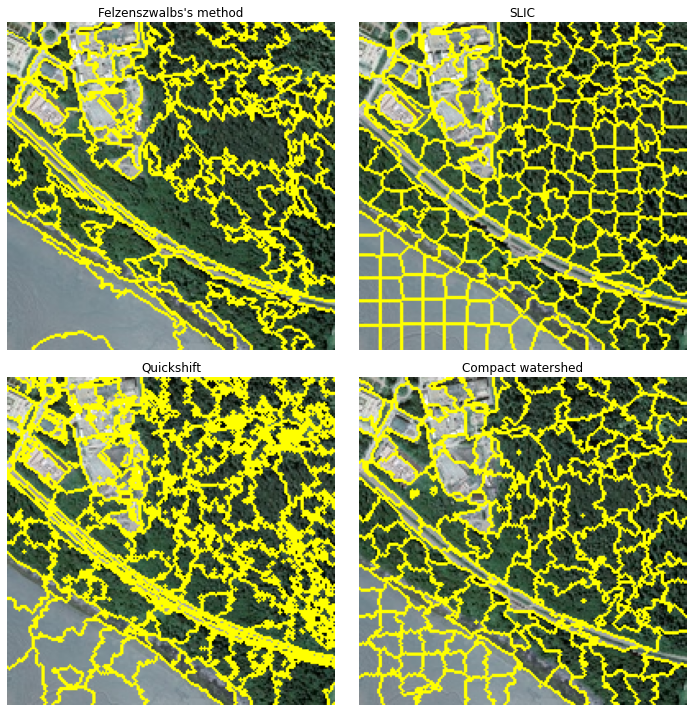

In [18]:
import matplotlib.pyplot as plt
import numpy as np

import cv2
from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

os.chdir("/home/jonathan/ubc/capstone/orthophoto/2014")

img = img_as_float(cv2.imread("483E_5454N_scaled.jpg"))

segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
segments_slic = slic(img, n_segments=250, compactness=10, sigma=1,
                     start_label=1)
segments_quick = quickshift(img, kernel_size=3, max_dist=6, ratio=0.5)
gradient = sobel(rgb2gray(img))
segments_watershed = watershed(gradient, markers=250, compactness=0.001)
print(type(segments_watershed))

print(f"Felzenszwalb number of segments: {len(np.unique(segments_fz))}")
print(f"SLIC number of segments: {len(np.unique(segments_slic))}")
print(f"Quickshift number of segments: {len(np.unique(segments_quick))}")

fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

ax[0, 0].imshow(mark_boundaries(img, segments_fz))
ax[0, 0].set_title("Felzenszwalbs's method")
ax[0, 1].imshow(mark_boundaries(img, segments_slic))
ax[0, 1].set_title('SLIC')
ax[1, 0].imshow(mark_boundaries(img, segments_quick))
ax[1, 0].set_title('Quickshift')
ax[1, 1].imshow(mark_boundaries(img, segments_watershed))
ax[1, 1].set_title('Compact watershed')

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()